In [1]:
import tensorflow as tf
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
import json
import pickle


from utils.utils_stylegan2 import convert_images_to_uint8

from stylegan2_generator import StyleGan2Generator
impl = 'cuda' # 'ref' if cuda is not available in your machine
gpu = True # False if tensorflow cpu is used

weights_name = 'ffhq' # face model trained by Nvidia
generator = StyleGan2Generator(weights=weights_name, impl=impl, gpu=gpu)

def regen_dlatents():
    global generator
    latent_samples = np.random.RandomState(123).randn(10000, 512).astype('float32')
    dlatent_samples = generator.mapping_network(latent_samples)
    dlatent_avg = np.mean(dlatent_samples, axis=0, keepdims=True) # [1, 18, 512]
    dlatent_std = (np.sum((dlatent_samples - dlatent_avg) ** 2) / 10000) ** 0.5
    np.save('/cont/dlatent_avg.npy', dlatent_avg)
    np.save('/cont/dlatent_std.npy', dlatent_std)

dlatent_avg = np.load('/cont/dlatent_avg.npy')
dlatent_std = np.load('/cont/dlatent_std.npy')

Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Loaded ffhq generator weights!


In [23]:
def generate_image(dlatent):
    global generator
    out = generator.synthesis_network(dlatent.reshape((1, 18, 512)))
    return convert_images_to_uint8(out, nchw_to_nhwc=True, uint8_cast=True).numpy()[0]
                                      
def show_images(*img):
    fig, ax = plt.subplots(1, len(img), squeeze=False)
    for i in range(len(img)):
        ax[0, i].imshow(img[i])
        ax[0, i].axis('off')
    
def save_image(img, name):
    PIL.Image.fromarray(img, 'RGB').save(name)

In [64]:
yaw = np.load('yaw.npy')
blinking = np.load('blinking.npy')
age = np.load('age.npy')
joy = np.load('joy.npy')
tone = -np.load('white.npy')
gender = np.load('gender.npy')
hairlength = np.load('hairlength.npy')
quality = np.load('quality.npy')

# We ignore quality because I don't really want the pictures to be the midpoint of 'quality'
vecs = [yaw, blinking, age, joy, tone, gender, hairlength]

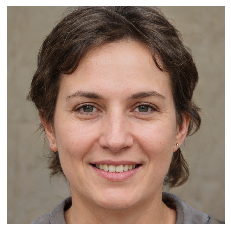

In [65]:
show_images(generate_image(dlatent_avg))

In [67]:
def generate_faces(row_names, data):
    global dlatent_avg, vecs
    N = len(data)
    assert N > 0, "need data"
    K = len(data[0])
    mins = data[0][:]
    maxs = data[0][:]
    
    for i in range(N):
        assert len(data[i]) == K, "data must be rectangular"
        for k in range(K):
            mins[k] = min(mins[k], data[i][k])
            maxs[k] = max(maxs[k], data[i][k])
    
    res = []
    for i in range(N):
        dlatent = dlatent_avg.copy()
        for k in range(K):
            rang = maxs[k] - mins[k]
            print(rang)
            if rang == 0:
                normed = 0.5
            else:
                normed = (float(data[i][k]) - mins[k]) / rang
            
            
            val = normed * 2 - 1
            dlatent += val * vecs[k]
        
        save_image(generate_image(dlatent), 'img/{}.png'.format(row_names[i]))

In [68]:

generate_faces(
["AARONSON,L.H.",
"ALEXANDER,J.M.",
"ARMENTANO,A.J.",
"BERDON,R.I.",
"BRACKEN,J.J.",
"BURNS,E.B.",
"CALLAHAN,R.J.",
"COHEN,S.S.",
"DALY,J.J.",
"DANNEHY,J.F.",
"DEAN,H.H.",
"DEVITA,H.J.",],
[
    [7.4,7.1,7.1,7.1,7,8.3,7.8],
    [8.1,8,8,7.8,7.9,8.5,8.7],
    [7.6,7.5,7.5,7.3,7.4,7.9,7.8],
    [8.5,8.7,8.7,8.4,8.5,8.8,8.7],
    [6.2,5.7,5.7,5.1,5.3,5.5,4.8],
    [8,8.1,8,8,8,8.6,8.6],
    [8.5,8.5,8.5,8.6,8.4,9.1,9],
    [5.9,4.8,5.1,4.7,4.9,6.8,5],
    [8.5,8.4,8.4,8.4,8.5,8.8,8.8],
    [8,7.9,8.1,7.7,7.8,8.5,7.9],
    [7.5,7.1,7.2,7.1,7.2,8.4,7.7],
    [7.1,6.9,7,7,7.1,6.9,7.2],
])

2.5999999999999996
3.8999999999999995
3.5999999999999996
3.8999999999999995
3.5999999999999996
3.5999999999999996
4.2
2.5999999999999996
3.8999999999999995
3.5999999999999996
3.8999999999999995
3.5999999999999996
3.5999999999999996
4.2
2.5999999999999996
3.8999999999999995
3.5999999999999996
3.8999999999999995
3.5999999999999996
3.5999999999999996
4.2
2.5999999999999996
3.8999999999999995
3.5999999999999996
3.8999999999999995
3.5999999999999996
3.5999999999999996
4.2
2.5999999999999996
3.8999999999999995
3.5999999999999996
3.8999999999999995
3.5999999999999996
3.5999999999999996
4.2
2.5999999999999996
3.8999999999999995
3.5999999999999996
3.8999999999999995
3.5999999999999996
3.5999999999999996
4.2
2.5999999999999996
3.8999999999999995
3.5999999999999996
3.8999999999999995
3.5999999999999996
3.5999999999999996
4.2
2.5999999999999996
3.8999999999999995
3.5999999999999996
3.8999999999999995
3.5999999999999996
3.5999999999999996
4.2
2.5999999999999996
3.8999999999999995
3.5999999999999996